In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [24]:
#load pkl files and plot the data
regression_theta = torch.load('tensor_collection\\lr_theta.pt')
regression_train_loss = torch.load('tensor_collection\\lr_train_loss.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_loss.pt')
cm_x_test = torch.load('tensor_collection\\cm_x_test.pt')
cm_y_test = torch.load('tensor_collection\\cm_y_test.pt')


Final training loss: 67.46393585205078
Final validation loss: 63.4619255065918


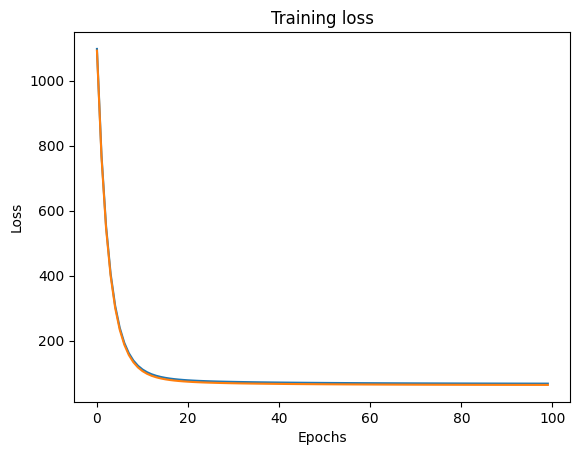

In [27]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

In [26]:
#get cm_y_hat

cm_x_test = np.insert(cm_x_test, 0, 1, axis=1)
cm_x_test = torch.from_numpy(cm_x_test)
cm_y_hat = torch.mm(cm_x_test, regression_theta)


plt.figure(1)
plt.plot(cm_y_test[0:50])
plt.plot(cm_y_hat[0:50])
plt.legend(['True', 'Predicted'])

RuntimeError: mat2 must be a matrix

In [ ]:
#calculate MSE
MSE = np.sum((cm_y_hat - cm_y_test)**2)/len(cm_y_test)
print('MSE: ', MSE)

#calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE: ', RMSE)

#calculate MAE
MAE = np.sum(np.abs(cm_y_hat - cm_y_test))/len(cm_y_test)
print('MAE: ', MAE)

#calculate R-Squared
R_squared = 1 - (np.sum((cm_y_hat - cm_y_test)**2)/np.sum((cm_y_test - np.mean(cm_y_test))**2))
print('R-Squared: ', R_squared)

#calculate Adjusted R-Squared
Adjusted_R_squared = 1 - (1-R_squared)*(len(cm_y_test)-1)/(len(cm_y_test)-len(regression_theta)-1)
print('Adjusted R-Squared: ', Adjusted_R_squared)

#calculate Mean Absolute Percentage Error
MAPE = np.sum(np.abs((cm_y_hat - cm_y_test)/cm_y_test))/len(cm_y_test)
print('MAPE: ', MAPE)

#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


NameError: name 'cm_y_hat' is not defined

In [ ]:
#load 
train_losses = torch.load('tensor_collection\\cnn_train_losses.pt')
val_losses = torch.load('tensor_collection\\cnn_val_losses.pt')
epochs = torch.load('tensor_collection\\cnn_epochs.pt')



Final validation loss: 292.31596088409424


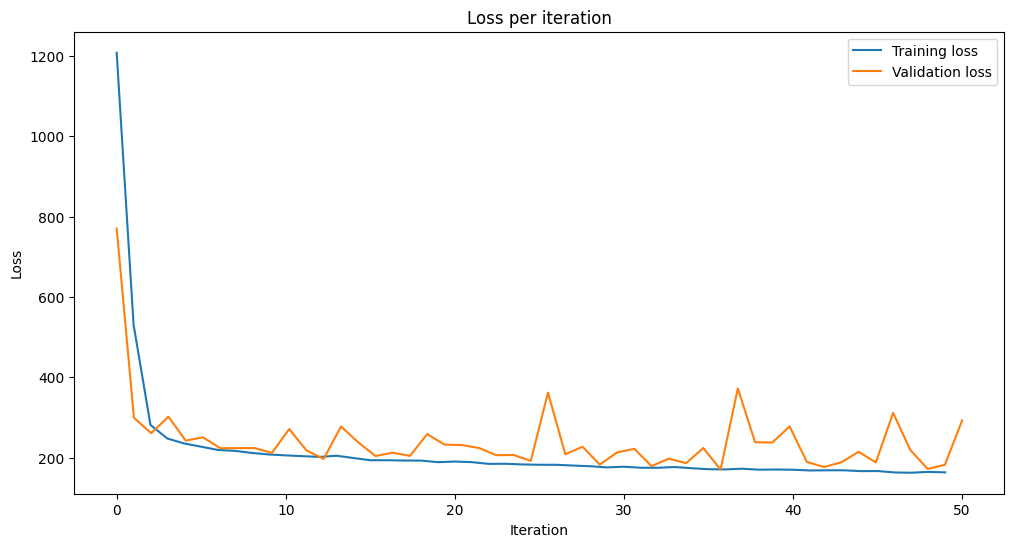

In [ ]:
plt.figure(0, figsize = (12,6))
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(train_losses)
plt.plot(np.linspace(0,len(train_losses),epochs), val_losses)
plt.legend(["Training loss","Validation loss"])
print('Final validation loss:',val_losses[-1])

In [ ]:
train_losses = torch.load('tensor_collection\\mmn_train_losses.pt')
val_losses = torch.load('tensor_collection\\mmn_val_losses.pt')
epochs = torch.load('tensor_collection\\mmn_epochs.pt')

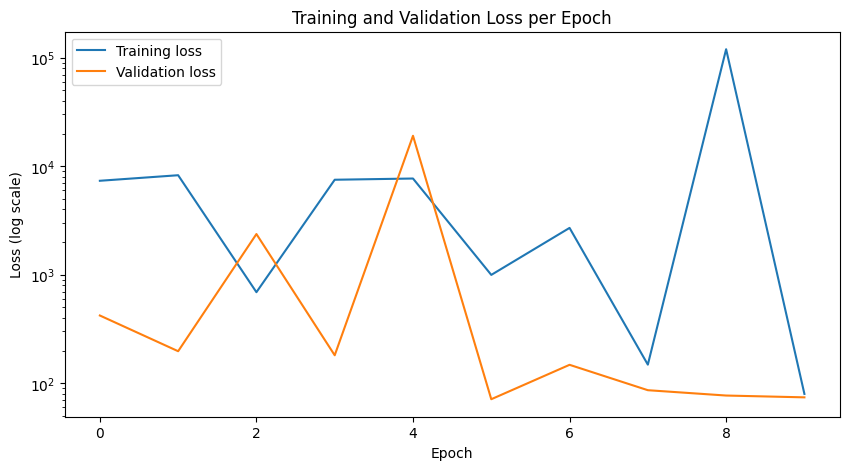

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_losses and val_losses are lists containing the loss values per epoch
plt.figure(figsize=(10, 5))

# Plot training loss
plt.semilogy(train_losses, label='Training loss')

# Plot validation loss
plt.semilogy(val_losses, label='Validation loss')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')

# Add a legend
plt.legend()

# Add a title
plt.title('Training and Validation Loss per Epoch')

# Show the plot
plt.show()



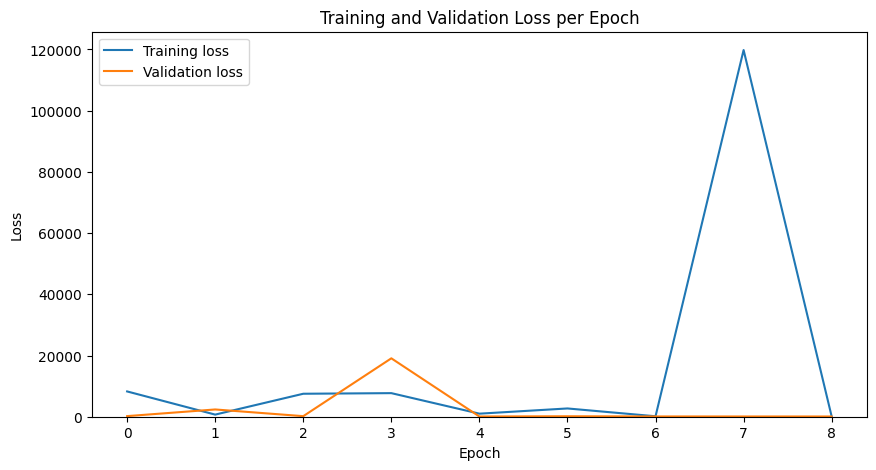

Final validation loss: 74.10268012682597


In [ ]:
# Plot with a restricted range after the initial loss drop
plt.figure(figsize=(10, 5))
plt.plot(train_losses[1:], label='Training loss')  # Skip the first loss if it's an outlier
plt.plot(val_losses[1:], label='Validation loss')  # Skip the first loss if it's an outlier
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss per Epoch')
plt.ylim(bottom=0)  # Set the bottom of the y-axis to 0
plt.show()
print('Final validation loss:',val_losses[-1])
